# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1



In [1]:
#total data information
import pandas as pd
df = pd.read_csv("pet_supplies_2212.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB
None


In [2]:
#change price to numeric and change to median
import numpy as np
df1 =df
df1["price"] = df["price"].apply(pd.to_numeric, errors = 'coerce')
print(df1.info())

price_mean = df1["price"].median()
df1["price"].fillna(price_mean, inplace = True)
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1350 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 93.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non

In [3]:
df1["rating"].fillna(0, inplace = True)
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1500 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 93.9+ KB
None


In [4]:
#Change capitalization
df1["size"]= df1["size"].str.title()
print(df1["size"])

0        Large
1       Medium
2       Medium
3        Small
4        Small
         ...  
1495    Medium
1496     Small
1497     Small
1498     Small
1499    Medium
Name: size, Length: 1500, dtype: object


In [5]:
# find the NA object
df_category = df1["category"].value_counts()
print("the category of category:\n",df_category)
####
df_animal = df1["animal"].value_counts()
print("the category of animal:\n",df_animal)
###
df_size = df1["size"].value_counts()
print("the category of size:\n",df_size)
###
df_repeat_purchase = df1["repeat_purchase"].value_counts()
print("the category of repeat_purchase:\n",df_repeat_purchase)

the category of category:
 Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: category, dtype: int64
the category of animal:
 Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64
the category of size:
 Small     754
Medium    492
Large     254
Name: size, dtype: int64
the category of repeat_purchase:
 1    906
0    594
Name: repeat_purchase, dtype: int64


In [13]:
df1["categroy"] = df1["category"].replace('-', "Unknown",inplace = True)
print(df1["category"].value_counts())

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
Unknown       25
Name: category, dtype: int64


**product_id**:correct description 
**category:**: 25 missing values"-", I used replace() to convert "-" to "Unknown"         
**animal**: correct description, no missing value           
**size**:  correct description, no missing value. I united all the title.       
**price**: 150 missiing values,I convert them to the median of the price                
**sales** : correct description, no missing value           
**rating** : 150 missing values,I convert them to 0         
**repeat_purchase**: correct description, no missing value 

## Task 2

Equipment    221
Medicine     153
Housing      152
Food         151
Toys         145
Accessory     70
Unknown       14
Name: category, dtype: int64


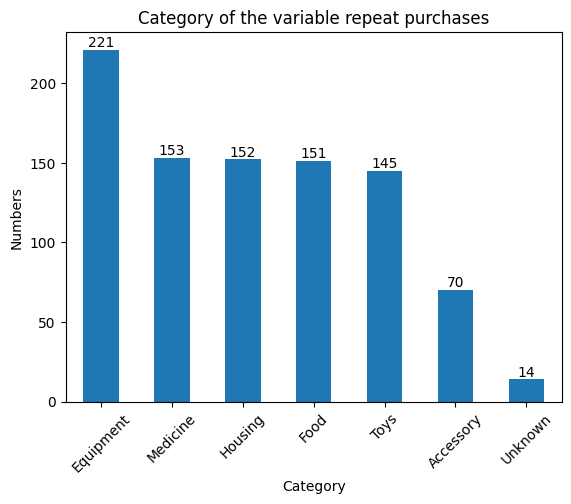

In [7]:
import matplotlib.pyplot as plt
df_repeat = df1[df1["repeat_purchase"] ==1]
print(df_repeat["category"].value_counts())
category_counts = df_repeat["category"].value_counts()
ax = category_counts.plot(kind = "bar",title="Category of the variable repeat purchases",
                                          rot =45,xlabel = "Category",
                                         ylabel = "Numbers")
for i, value in enumerate(category_counts):
    ax.text(i, value, str(value), ha='center', va='bottom')
plt.show()

The "Equipment" categroy has the most observations in the repeat purchases. The number of "Equipment" is around 70 samples more than the rest of the categories. The numbert of  Medicine, Housing, Food, and Toys are around 150. The number of Accessory is the lowest. There are 14 unknown variables which I can exclude them.There are approximately 70 observations where two categories have more or fewer observations compared to the average number of groups. I considered the obsevations are not perfectly balanced across categories of the repeat purchases.

## Task 3

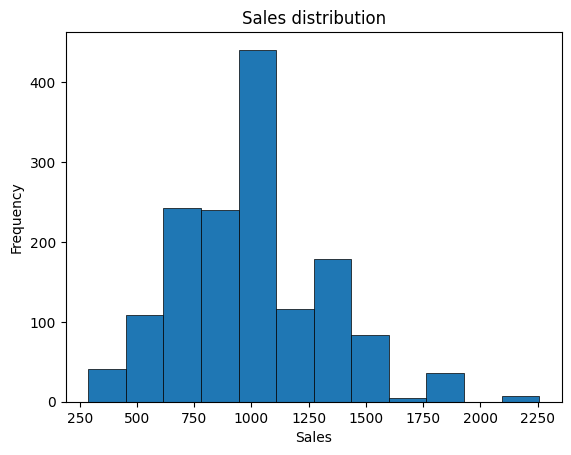

In [8]:
import matplotlib.pyplot as plt
ax = df1["sales"].plot.hist(bins = 12,edgecolor='black', linewidth= 0.5)
plt.title("Sales distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

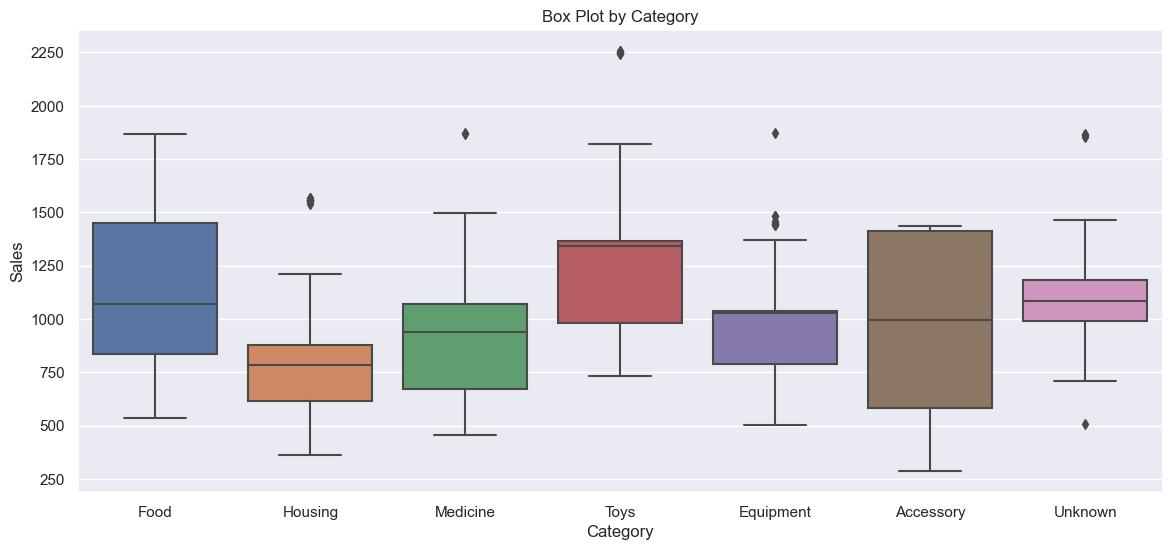

In [9]:

import seaborn as sns

# Create the box plot using seaborn
sns.set(rc={'figure.figsize': (14, 6)})
sns.boxplot(data=df1, x='category', y='sales')

# Set the title and axis labels
plt.title('Box Plot by Category')
plt.xlabel('Category')
plt.ylabel('Sales')

# Show the plot
plt.show()

When examining the overall sales distribution, the sales peak occurs at 1000. If we exclude outliers exceeding 1600, the distribution resembles a normal distribution. Analyzing the distribution grouped by categories, the majority of sales in each category fall within the range of 500 to 1500. From a distribution perspective, Accessory exhibits the widest range. The distributions of Toys and Equipment are influenced by outliers, resulting in the median being close to the 75th percentile.

## Task 4

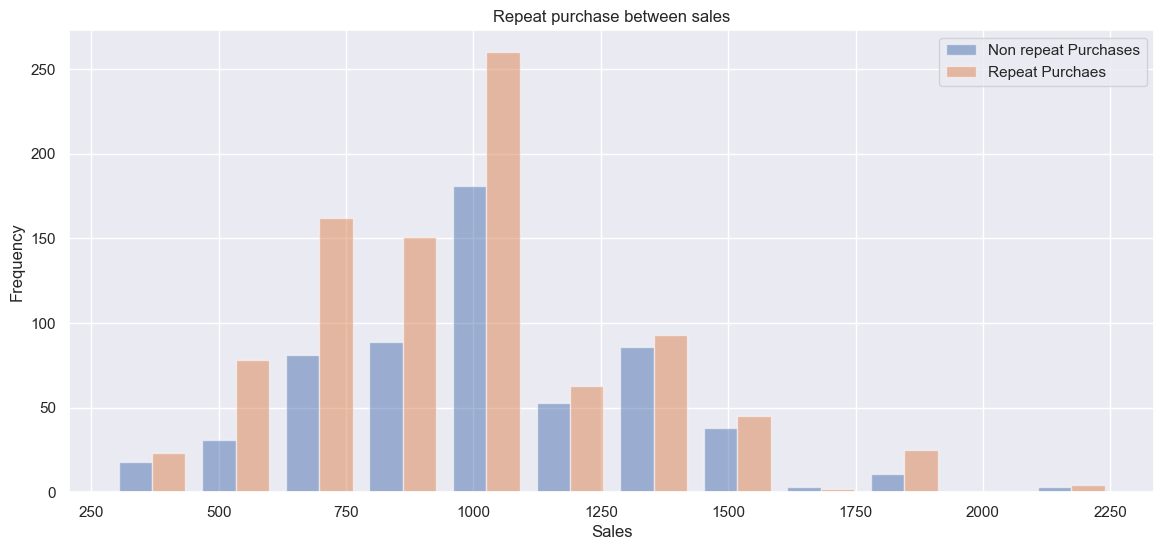

In [10]:
df_0 = df1[df1["repeat_purchase"] == 0]["sales"]
df_1 = df1[df1["repeat_purchase"] == 1]["sales"]
plt.hist([df_0, df_1], bins =12, label=['Non repeat Purchases', 'Repeat Purchaes'], alpha = 0.5)
plt.legend(loc='upper right')
plt.title("Repeat purchase between sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'Sales')

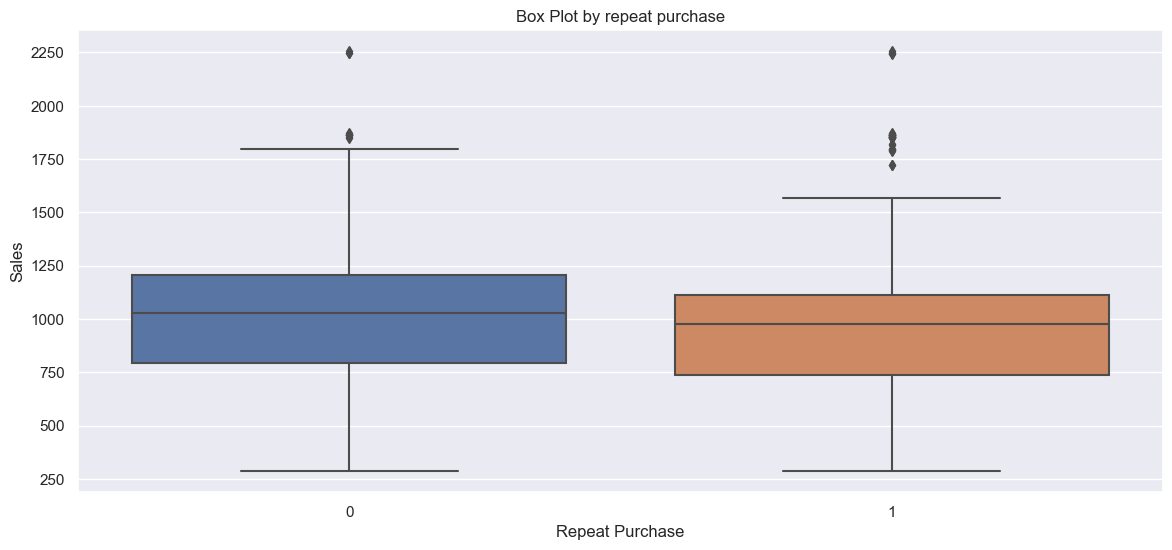

In [11]:
sns.boxplot(data=[df_0,df_1])

# Set the title and axis labels
plt.title('Box Plot by repeat purchase')
plt.xlabel('Repeat Purchase')
plt.ylabel('Sales')


When comparing the sales distribution to repeat purchases, it becomes evident that the number of sales is higher among repeat customers compared to first-time buyers.However, the sample is not balanced. The total number of repeat purchases is higher than non-repeat purchases. From the histogram figure,the difference of sales between repeat purchases and non-repeat purchases is large in 600 to 1000. But when looking at the boxplot figure, the mean and the range of the sales is not so different. I would say there is not a significant relationship between repeat purchases and sales.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam